In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
df = pd.read_csv('G:\EDA1-master\Total Data.csv')

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predict
0,28,1,2,130,132,0,2,185,0,0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0,?,?,?,0


In [72]:
new_df = df.replace('?',np.nan)

In [73]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predict
0,28,1,2,130,132,0,2,185,0,0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0,NaN,NaN,NaN,0


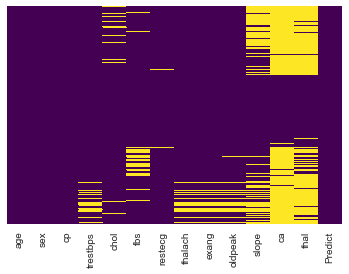

In [62]:
sns.heatmap(new_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [74]:
from sklearn.impute import SimpleImputer

In [79]:
mean_imputer = SimpleImputer(strategy='mean')
new_df.iloc[:,:] = mean_imputer.fit_transform(new_df) 

In [80]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predict
0,28.0,1.0,2.0,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,1.770867,0.676375,5.087558,0.0
1,29.0,1.0,2.0,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,1.770867,0.676375,5.087558,0.0
2,29.0,1.0,2.0,140.0,199.130337,0.0,0.0,170.0,0.0,0.0,1.770867,0.676375,5.087558,0.0
3,30.0,0.0,1.0,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,1.770867,0.676375,6.000000,0.0
4,31.0,0.0,2.0,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,1.770867,0.676375,5.087558,0.0


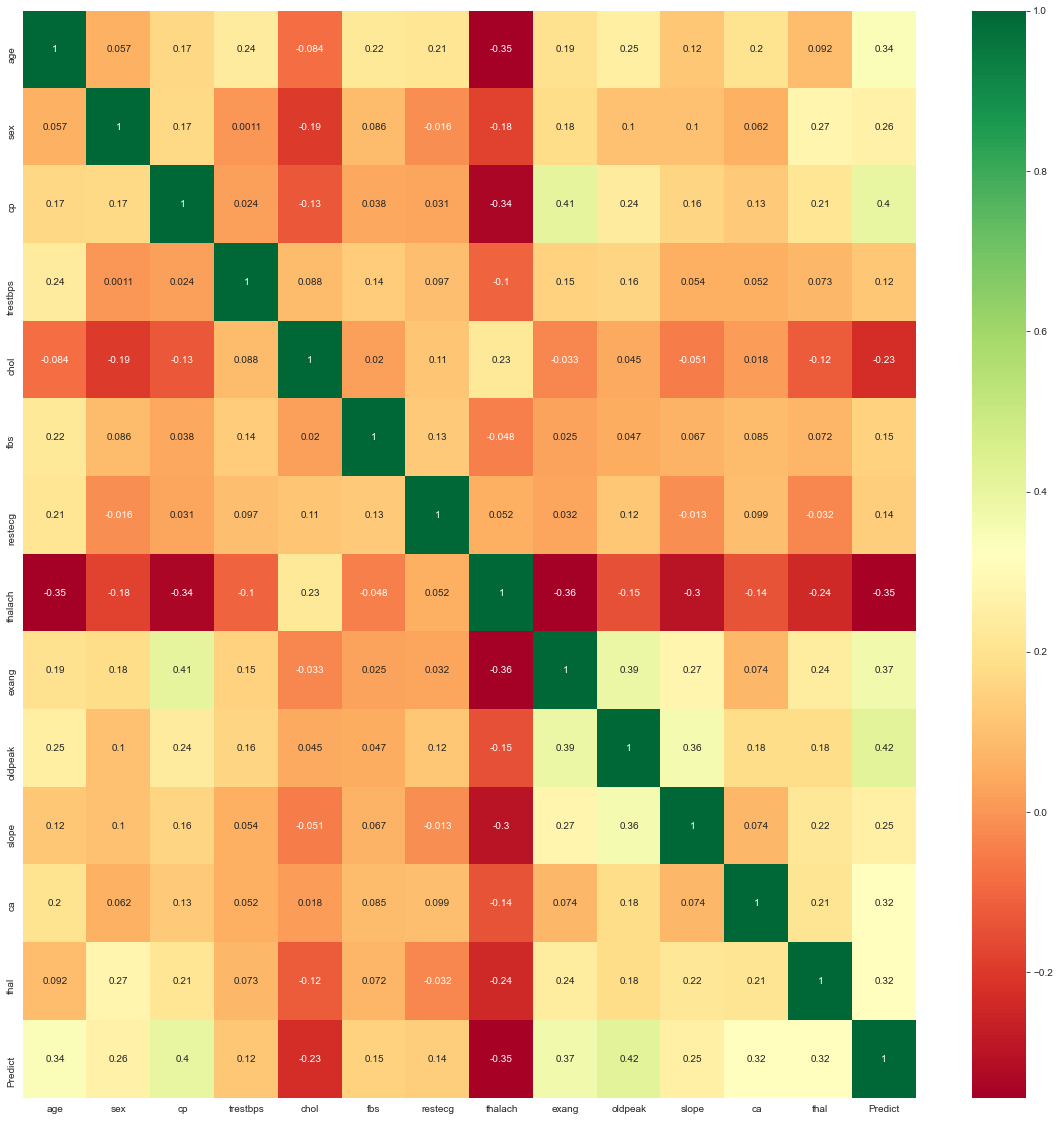

In [81]:
import seaborn as sns
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(new_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


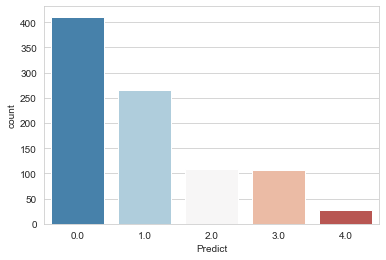

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='Predict',data=new_df,palette='RdBu_r')

In [82]:
new_df = pd.get_dummies(new_df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
new_df[columns_to_scale] = standardScaler.fit_transform(new_df[columns_to_scale])

In [86]:
new_df.head()

,age,trestbps,chol,thalach,oldpeak,Predict,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,slope_3.0,ca_0.0,ca_0.6763754045307443,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_5.087557603686636,thal_6.0,thal_7.0
0,-2.708286,-0.115679,-6.164492e-01,1.888743,-0.834397,0.0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,-2.602124,-0.658158,4.028495e-01,0.893711,-0.834397,0.0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,-2.602124,0.426801,-2.609929e-16,1.291724,-0.834397,0.0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,-2.495962,2.054240,3.477522e-01,1.291724,-0.834397,0.0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,-2.389800,-1.743118,1.824606e-01,0.495698,-0.834397,0.0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [87]:
y = new_df['Predict']
X = new_df.drop(['Predict'], axis = 1)


In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [91]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,51):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=15)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

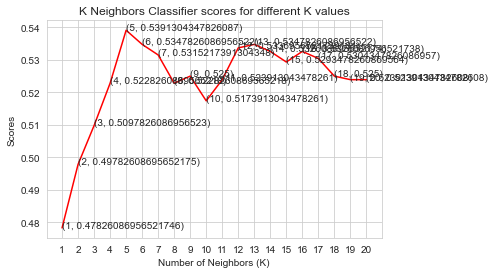

In [95]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [96]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [97]:
score.mean()

0.5336956521739131

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [100]:
score.mean()

0.5195652173913043